### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Function to Read and Load .cfile Data

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

### Calculate RSSI

In [3]:
def calculate_rssi(complex_data):
    """
    Calculate RSSI as 10 * log10(I[k]^2 + Q[k]^2) for each sample.
    """
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    rssi = 10 * np.log10(I**2 + Q**2)
    
    return rssi

### Plot RSSI function

In [7]:
def plot_rssi_vs_time(rssi, sample_rate):
    """
    Plot RSSI versus time.
    
    Parameters:
    - rssi: Array of RSSI values
    - sample_rate: Sampling rate of the data in Hz
    """
    # Adjust matplotlib settings to handle large data sets
    plt.rcParams['agg.path.chunksize'] = 10000  # Default is 0, meaning no limit
    plt.rcParams['path.simplify_threshold'] = 1.0  # Adjust the path simplification threshold

    # Calculate time vector based on the number of samples and sampling rate
    N = len(rssi)
    time = np.arange(N) / sample_rate
    print(N)
    print(time)
    # Plot RSSI vs Time
    plt.figure(figsize=(10, 6))
    plt.plot(time, rssi)
    plt.xlabel("Time (s)")
    # plt.xlim(1.5, 1.50001)
    plt.ylabel("RSSI (dB)")
    plt.title("RSSI vs Time")
    plt.grid(True)
    plt.show()

In [6]:
def plot_rssi_vs_time2(rssi1, rssi2, sample_rate):
    """
    Plot two RSSI versus time plots on top of each other.
    
    Parameters:
    - rssi1: Array of RSSI values for the first plot
    - rssi2: Array of RSSI values for the second plot
    - sample_rate: Sampling rate of the data in Hz
    """
    # Adjust matplotlib settings to handle large data sets
    plt.rcParams['agg.path.chunksize'] = 10000  # Handle large data sets
    plt.rcParams['path.simplify_threshold'] = 1.0  # Path simplification threshold

    # Calculate time vector based on the number of samples and sampling rate
    N1 = len(rssi1)
    N2 = len(rssi2)
    time1 = np.arange(N1) / sample_rate
    time2 = np.arange(N2) / sample_rate

    # Plot RSSI vs Time
    plt.figure(figsize=(10, 6))
    plt.plot(time1, rssi1, label="RSSI 1", alpha=0.7)  # Plot the first dataset
    plt.plot(time2, rssi2, label="RSSI 2", alpha=0.7)  # Plot the second dataset
    plt.xlabel("Time (s)")
    plt.ylabel("RSSI (dB)")
    plt.title("RSSI vs Time")
    plt.grid(True)
    plt.legend()
    plt.show()


In [4]:
def plot_rssi_vs_time2_correct(data1, data2, sample_rate):
    """
    Plot two RSSI versus time plots on top of each other.
    
    Parameters:
    - rssi1: Array of RSSI values for the first plot
    - rssi2: Array of RSSI values for the second plot
    - sample_rate: Sampling rate of the data in Hz
    """
    # Adjust matplotlib settings to handle large data sets
    plt.rcParams['agg.path.chunksize'] = 10000  # Handle large data sets
    plt.rcParams['path.simplify_threshold'] = 1.0  # Path simplification threshold

    rssi1 = calculate_rssi(data1)
    rssi2 = calculate_rssi(data2)

    # Calculate time vector based on the number of samples and sampling rate
    N1 = len(rssi1)
    N2 = len(rssi2)
    time1 = np.arange(N1) / sample_rate
    time2 = np.arange(N2) / sample_rate

    # Plot RSSI vs Time
    plt.figure(figsize=(10, 6))
    plt.plot(time1, rssi1, label="RSSI 1", alpha=0.7)  # Plot the first dataset
    plt.plot(time2, rssi2, label="RSSI 2", alpha=0.7)  # Plot the second dataset
    plt.xlabel("Time (s)")
    plt.ylabel("RSSI (dB)")
    plt.title("RSSI vs Time")
    plt.grid(True)
    plt.legend()
    plt.show()

### Plot IQ Angle

In [12]:
def plot_IQ_Angle(complex_data):
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    angle = np.arctan(Q/I)
    plt.plot(angle, color='red')
    plt.title('IQ Angle Component')
    plt.xlabel('Sample Number')
    plt.ylabel('Angle')
    plt.legend()
    plt.show()

In [7]:
def plot_IQ_Angle2(complex_data1, complex_data2):
    I1 = np.real(complex_data1)
    Q1 = np.imag(complex_data1)

    I2 = np.real(complex_data2)
    Q2 = np.imag(complex_data2)
    
    # Calculate RSSI for each sample
    angle1 = np.arctan(Q1/I1)
    angle2 = np.arctan(Q2/I2)
    plt.plot(angle1, color='red')
    plt.plot(angle2, color='blue')
    plt.title('IQ Angle Component')
    plt.xlabel('Sample Number')
    plt.ylabel('Angle')
    plt.legend()
    plt.show()

### Calculate IQ Magnitude

In [9]:
def calculate_IQMagnitude(complex_data):
    """
    Calculate RSSI as 10 * log10(I[k]^2 + Q[k]^2) for each sample.
    """
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    magnitude = np.sqrt(I**2 + Q**2)
    
    return magnitude

### Plot IQ Magnitude

In [5]:
def plot_IQ_magnitude(complex_data):
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    magnitude = np.sqrt(I**2 + Q**2)
    plt.plot(magnitude, color='red')
    plt.title('IQ Magnitude Component')
    plt.xlabel('Sample Number')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()

In [3]:
def plot_IQ_magnitude2(complex_data1, complex_data2):
    I1 = np.real(complex_data1)
    Q1 = np.imag(complex_data1)

    I2 = np.real(complex_data2)
    Q2 = np.imag(complex_data2)
    
    # Calculate RSSI for each sample
    magnitude1 = np.sqrt(I1**2 + Q1**2)
    magnitude2 = np.sqrt(I2**2 + Q2**2)
    plt.plot(magnitude1, color='red')
    plt.plot(magnitude2, color='blue')
    plt.title('IQ Magnitude Component')
    plt.xlabel('Sample Number')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()

### Calculate SNR

In [7]:
def calculate_snr_mean_std(signal_complex_data, noise_complex_data):
    """
    Calculate SNR (Signal-to-Noise Ratio) using mean of the signal and standard deviation of the noise.
    
    SNR = 20 * log10(mean_signal_power / std_noise_power)
    
    signal_complex_data: array of complex numbers representing the signal
    noise_complex_data: array of complex numbers representing the noise
    """
    # Separate I and Q data for signal and noise
    I_signal = np.real(signal_complex_data)
    Q_signal = np.imag(signal_complex_data)
    
    I_noise = np.real(noise_complex_data)
    Q_noise = np.imag(noise_complex_data)
    
    # Calculate power of signal and noise
    signal_power = I_signal**2 + Q_signal**2
    noise_power = I_noise**2 + Q_noise**2
    
    # Calculate mean of the signal power and standard deviation of the noise power
    mean_signal_power = np.mean(signal_power)
    std_noise_power = np.std(noise_power)
    
    # Calculate SNR
    snr = 20 * np.log10(mean_signal_power / std_noise_power)
    
    return snr

In [3]:
def calculate_snr_mean_std_windowed(signal_complex_data, noise_complex_data, window_length):
    """
    Calculate SNR (Signal-to-Noise Ratio) over multiple windows using mean of the signal power 
    and standard deviation of the noise power.
    
    SNR for each window = 20 * log10(mean_signal_power / std_noise_power)
    
    signal_complex_data: array of complex numbers representing the signal
    noise_complex_data: array of complex numbers representing the noise
    window_length: length of each window to calculate the SNR
    
    Returns:
    snr_array: array of SNR values for each window
    """
    # Ensure input data are numpy arrays
    signal_complex_data = np.array(signal_complex_data)
    noise_complex_data = np.array(noise_complex_data)
    
    # Number of windows
    num_windows = len(signal_complex_data) // window_length
    
    # Initialize array to store SNR values for each window
    snr_array = []
    
    # Calculate SNR for each window
    for i in range(num_windows):
        # Extract window data for signal and noise
        window_signal = signal_complex_data[i * window_length: (i + 1) * window_length]
        window_noise = noise_complex_data[i * window_length: (i + 1) * window_length]
        
        # Separate I and Q data for signal and noise
        I_signal = np.real(window_signal)
        Q_signal = np.imag(window_signal)
        
        I_noise = np.real(window_noise)
        Q_noise = np.imag(window_noise)
        
        # Calculate power of signal and noise
        signal_power = I_signal**2 + Q_signal**2
        noise_power = I_noise**2 + Q_noise**2
        
        # Calculate mean of the signal power and standard deviation of the noise power
        mean_signal_power = np.mean(signal_power)
        std_noise_power = np.std(noise_power)
        
        # Calculate SNR for the window
        snr = 20 * np.log10(mean_signal_power / std_noise_power)
        snr_array.append(snr)
    
    return np.array(snr_array)

### Plot SNR

In [8]:
def plot_snr(signal_complex_data, noise_complex_data):
    """
    Calculate SNR using mean/std method and plot the SNR values with samples on the x-axis.
    """
    # Calculate SNR for the given data
    snr_value = calculate_snr_mean_std(signal_complex_data, noise_complex_data)
    
    # Plot SNR
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(signal_complex_data)), snr_value * np.ones(len(signal_complex_data)), label=f'SNR: {snr_value:.2f} dB')
    plt.xlabel('Samples')
    plt.ylabel('SNR (dB)')
    plt.title('SNR vs Samples')
    plt.legend()
    plt.grid(True)
    plt.show()

### Plot I vs Q

In [9]:
def plot_I_vs_Q(complex_data):
    """
    Plot the in-phase (I) component against the quadrature (Q) component.
    
    I is on the x-axis and Q is on the y-axis.
    """
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    samples = np.arange(len(complex_data))
    
    # Plot I vs Q
    plt.figure(figsize=(8, 8))
    plt.scatter(I, Q, c='blue', marker='o', alpha=0.5)
    plt.xlabel('In-Phase (I)')
    plt.ylabel('Quadrature (Q)')
    plt.title('I vs Q Plot')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

    # fig = plt.figure(figsize = (10, 7))
    # ax = plt.axes(projection ="3d")
    
    # # Creating plot
    # ax.scatter3D(I, Q, samples, color = "green")
    # plt.title("simple 3D scatter plot")
    
    # # show plot
    # plt.show()

### Reading and Loading a .cfile to Numpy Array

In [4]:
dataWithOutInterference = getData("./WithOutInterferenceLoraDay2.cfile")
dataWithInterference = getData("./WithInterferenceLoraDay2.cfile")

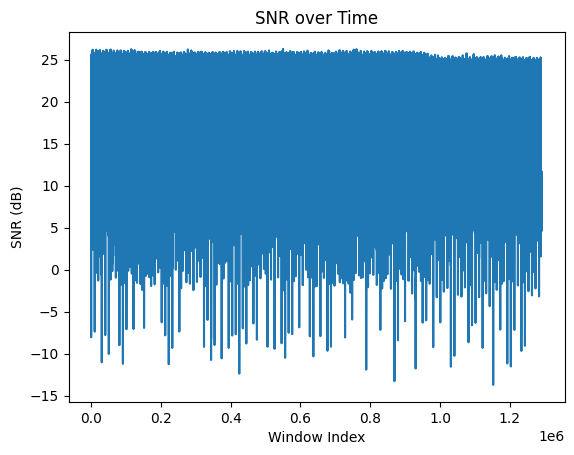

In [5]:
snr_values = calculate_snr_mean_std_windowed(dataWithInterference, dataWithInterference, window_length=100)

plt.plot(snr_values)
plt.xlabel('Window Index')
plt.ylabel('SNR (dB)')
plt.title('SNR over Time')
plt.show()

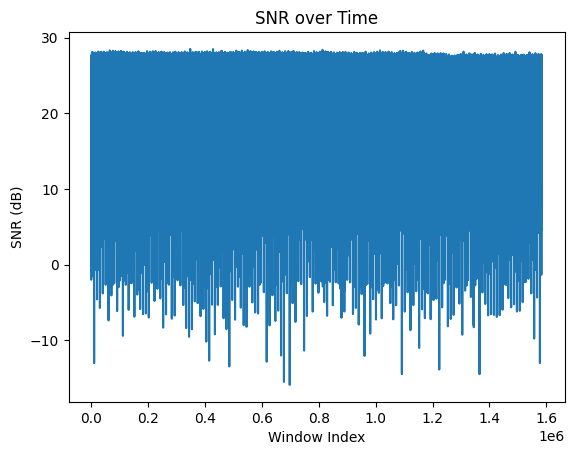

In [7]:
snr_values_without = calculate_snr_mean_std_windowed(dataWithOutInterference, dataWithOutInterference, window_length=100)

plt.plot(snr_values_without)
plt.xlabel('Window Index')
plt.ylabel('SNR (dB)')
plt.title('SNR over Time')
plt.show()

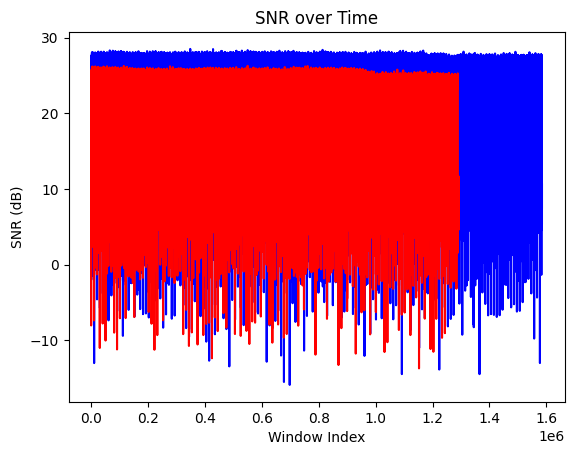

In [8]:
plt.plot(snr_values_without, color='blue', label='SNR without noise reduction')
plt.plot(snr_values, color='red', label='SNR with noise reduction')
plt.xlabel('Window Index')
plt.ylabel('SNR (dB)')
plt.title('SNR over Time')
plt.show()

### Plot RSSI

In [18]:
dataWithLoRarssi = calculate_rssi(dataWithOutLoRa)
dataWithOutLoRaRssi = calculate_rssi(dataWithLoRa)

NameError: name 'dataWithOutLoRa' is not defined

158467506
[0.00000000e+00 5.00000000e-08 1.00000000e-07 ... 7.92337515e+00
 7.92337520e+00 7.92337525e+00]


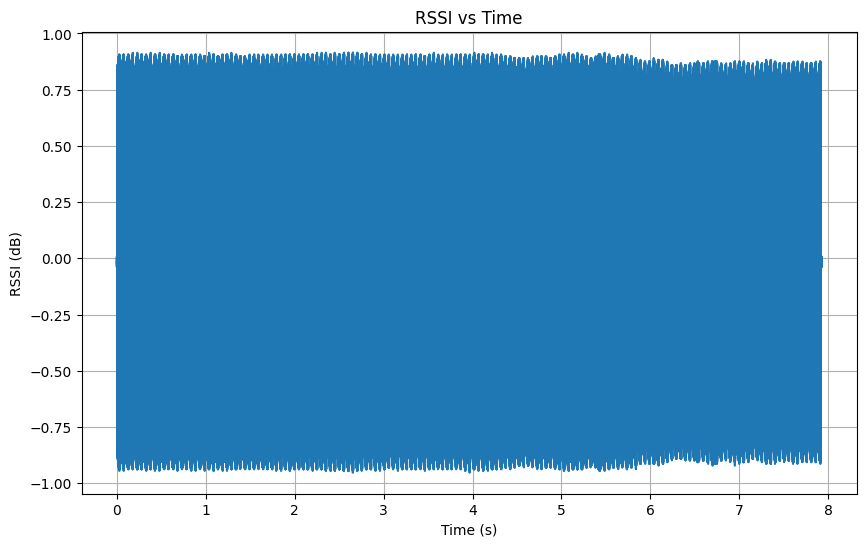

In [16]:
sample_rate = 20e6
plot_rssi_vs_time(dataWithOutInterference, sample_rate)

129237835
[0.00000000e+00 5.00000000e-08 1.00000000e-07 ... 6.46189160e+00
 6.46189165e+00 6.46189170e+00]


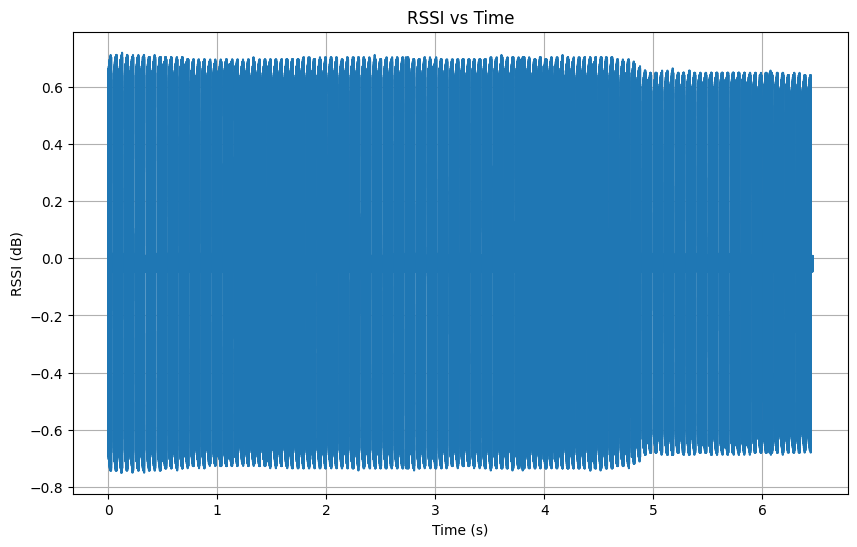

In [17]:
sample_rate = 20e6
plot_rssi_vs_time(dataWithInterference, sample_rate)

c:\Users\Sanduni\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Sanduni\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Sanduni\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


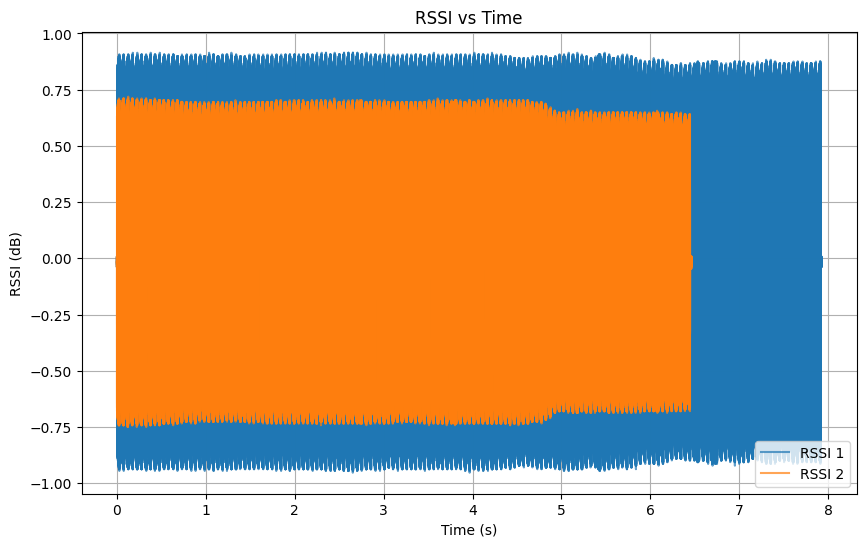

In [9]:
sample_rate = 20e6
plot_rssi_vs_time2(dataWithOutInterference, dataWithInterference, sample_rate)

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_15204\277351076.py:10: RuntimeWarning: divide by zero encountered in log10
  rssi = 10 * np.log10(I**2 + Q**2)
C:\Users\Sanduni\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


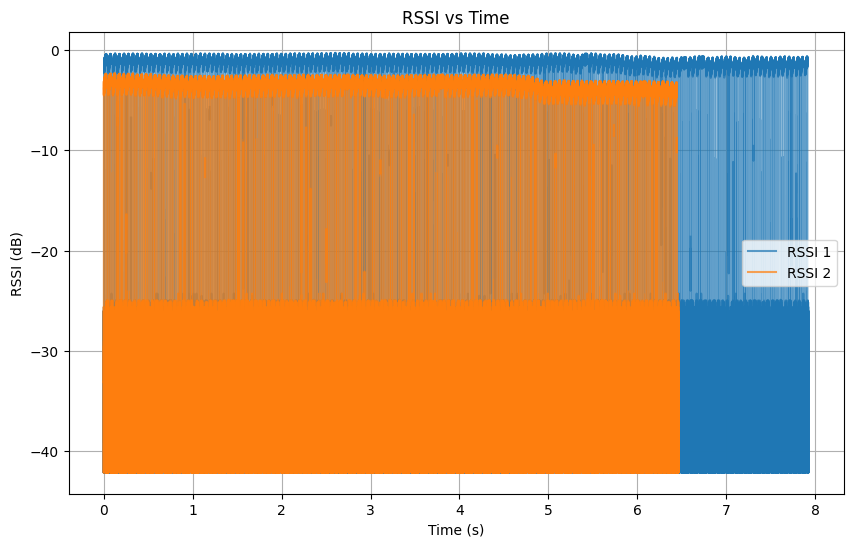

In [6]:
sample_rate = 20e6
plot_rssi_vs_time2_correct(dataWithOutInterference, dataWithInterference, sample_rate)

### Plot I/Q ( in-phase and quadrature)

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_24904\1677127246.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Sanduni\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


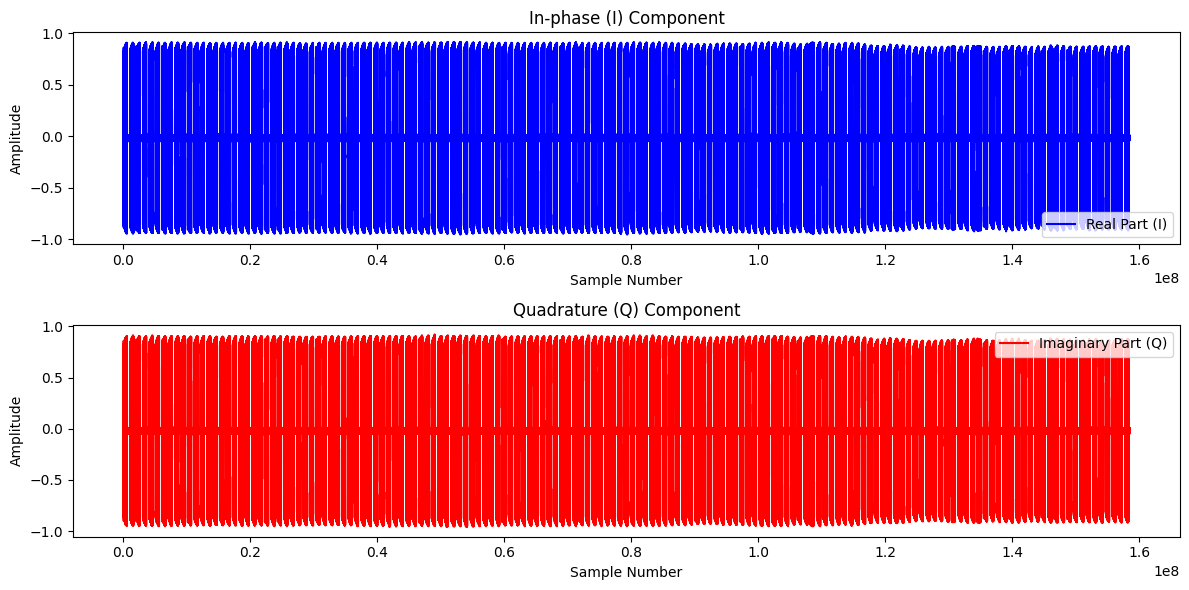

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(np.real(dataWithOutInterference), label='Real Part (I)', color='blue')
plt.title('In-phase (I) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.imag(dataWithOutInterference), label='Imaginary Part (Q)', color='red')
plt.title('Quadrature (Q) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_24904\2837844939.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


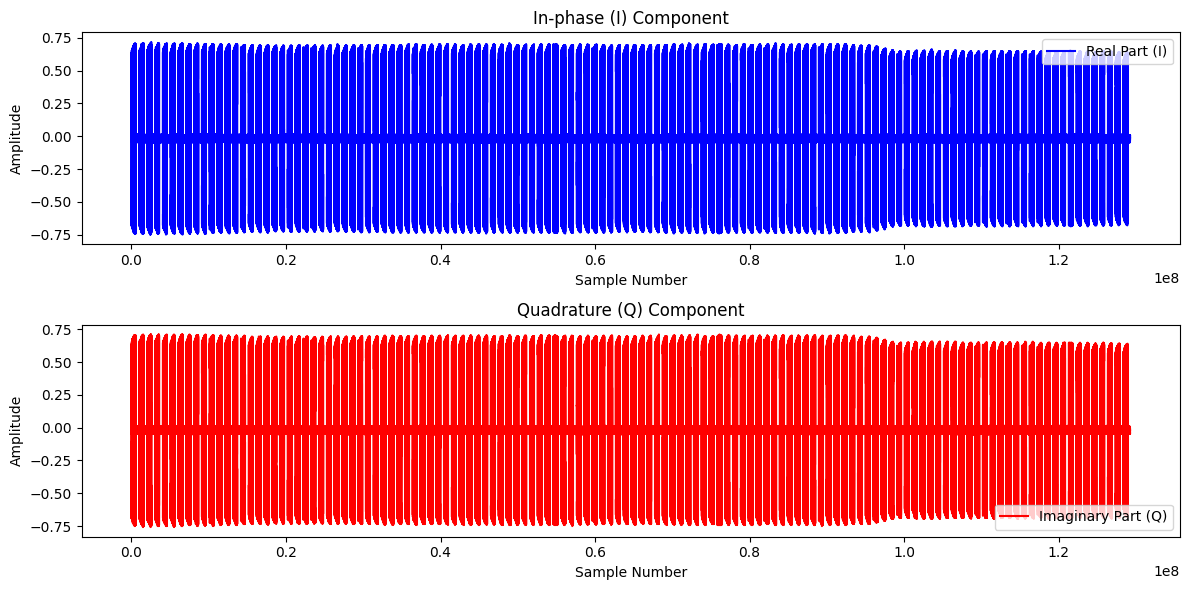

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(np.real(dataWithInterference), label='Real Part (I)', color='blue')
plt.title('In-phase (I) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.imag(dataWithInterference), label='Imaginary Part (Q)', color='red')
plt.title('Quadrature (Q) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\Sanduni\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


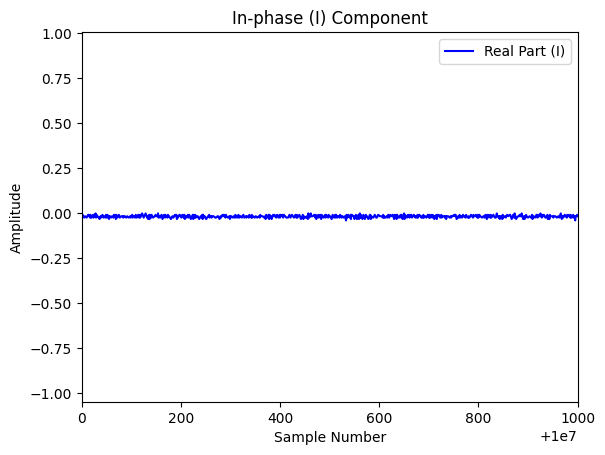

In [18]:
plt.plot(np.real(dataWithOutInterference), label='Real Part (I)', color='blue')
plt.xlim(1e7, 1.0001e7)
plt.title('In-phase (I) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

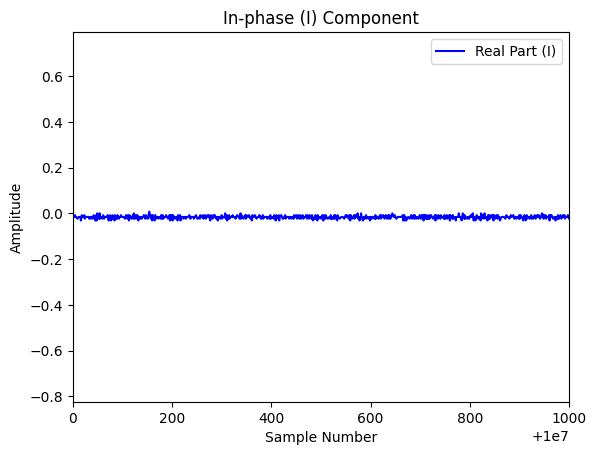

In [19]:
plt.plot(np.real(dataWithInterference), label='Real Part (I)', color='blue')
plt.xlim(1e7, 1.0001e7)
plt.title('In-phase (I) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

MemoryError: Unable to allocate 2.36 GiB for an array with shape (158467506, 2) and data type float64

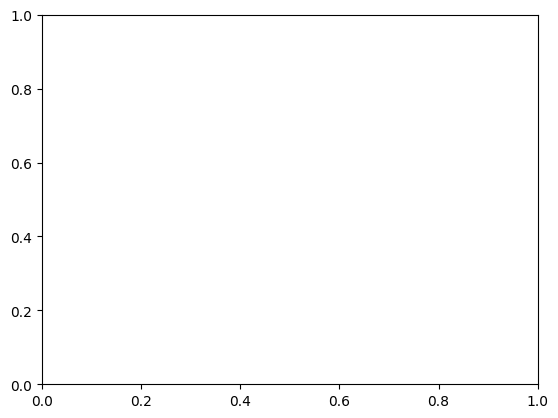

In [21]:
plot_IQ_magnitude(dataWithOutInterference)

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_8760\3802027834.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


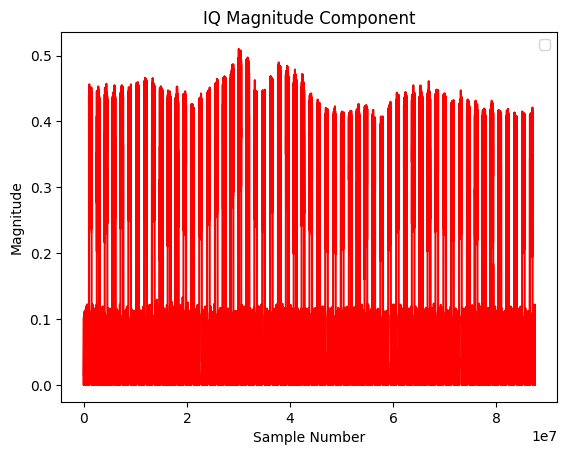

In [16]:
plot_IQ_magnitude(dataWithInterference)

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_30964\3802027834.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Sanduni\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


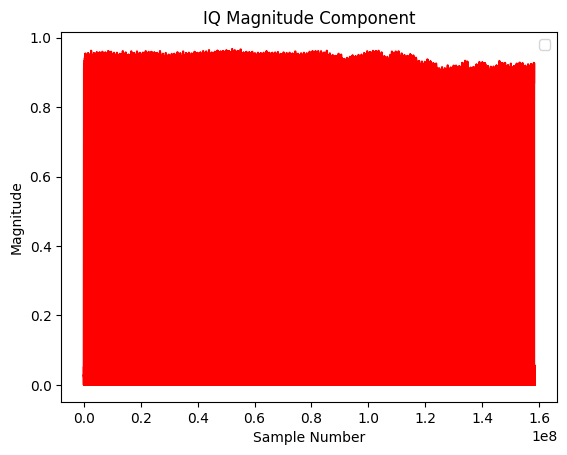

In [6]:
plot_IQ_magnitude(dataWithOutInterference)

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_30964\3802027834.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


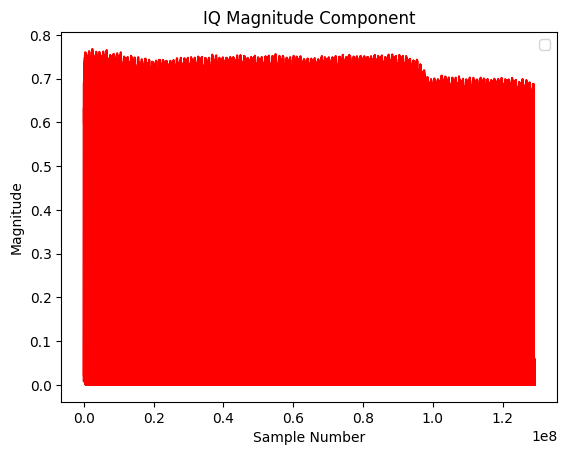

In [7]:
plot_IQ_magnitude(dataWithInterference)

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_14208\2751027497.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Sanduni\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


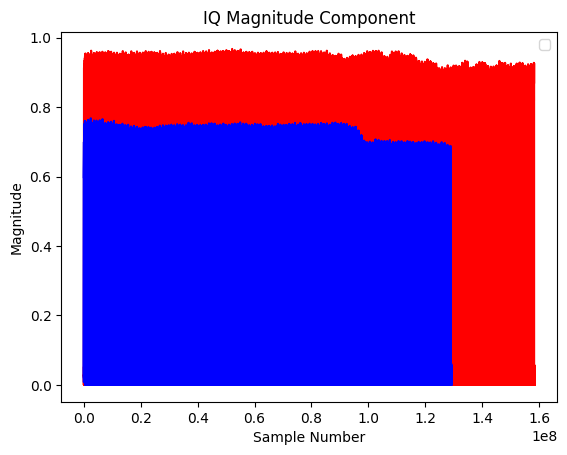

In [6]:
plot_IQ_magnitude2(dataWithOutInterference, dataWithInterference)

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_14376\461886881.py:6: RuntimeWarning: divide by zero encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Sanduni\AppData\Local\Temp\ipykernel_14376\461886881.py:6: RuntimeWarning: invalid value encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Sanduni\AppData\Local\Temp\ipykernel_14376\461886881.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Sanduni\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


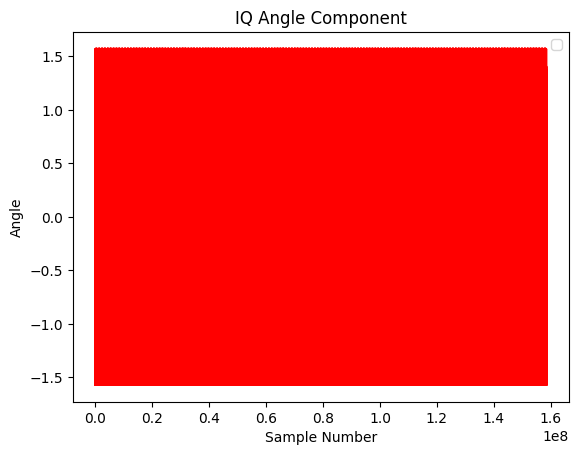

In [13]:
plot_IQ_Angle(dataWithOutInterference)

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_14376\461886881.py:6: RuntimeWarning: divide by zero encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Sanduni\AppData\Local\Temp\ipykernel_14376\461886881.py:6: RuntimeWarning: invalid value encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Sanduni\AppData\Local\Temp\ipykernel_14376\461886881.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


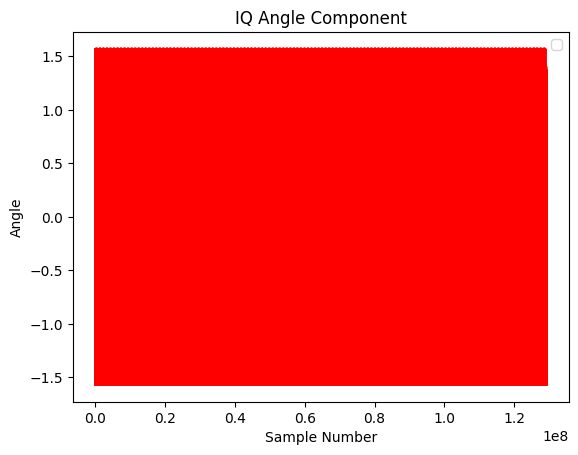

In [14]:
plot_IQ_Angle(dataWithInterference)

C:\Users\Sanduni\AppData\Local\Temp\ipykernel_28588\1164924248.py:9: RuntimeWarning: divide by zero encountered in divide
  angle1 = np.arctan(Q1/I1)
C:\Users\Sanduni\AppData\Local\Temp\ipykernel_28588\1164924248.py:9: RuntimeWarning: invalid value encountered in divide
  angle1 = np.arctan(Q1/I1)
C:\Users\Sanduni\AppData\Local\Temp\ipykernel_28588\1164924248.py:10: RuntimeWarning: divide by zero encountered in divide
  angle2 = np.arctan(Q2/I2)
C:\Users\Sanduni\AppData\Local\Temp\ipykernel_28588\1164924248.py:10: RuntimeWarning: invalid value encountered in divide
  angle2 = np.arctan(Q2/I2)
C:\Users\Sanduni\AppData\Local\Temp\ipykernel_28588\1164924248.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


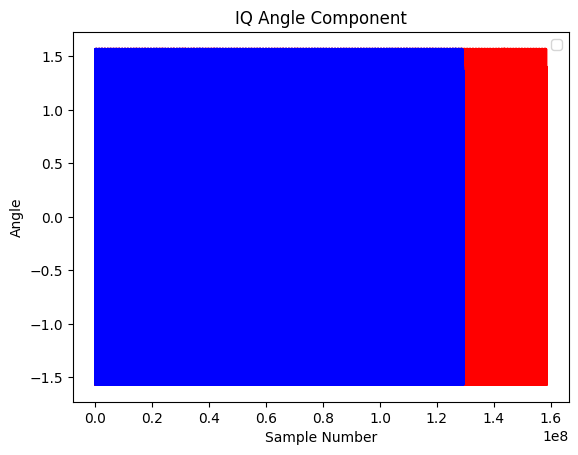

In [8]:
plot_IQ_Angle2(dataWithOutInterference, dataWithInterference)

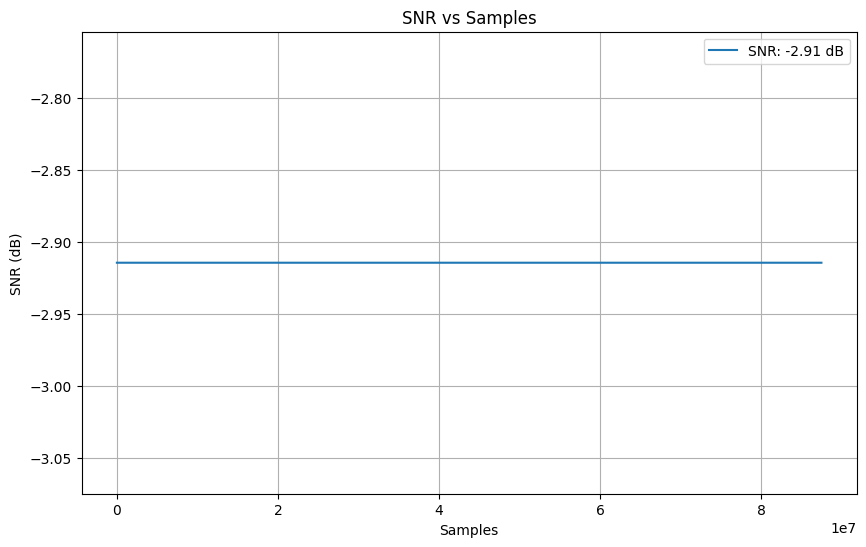

In [9]:
plot_snr(dataWithLoRa, dataWithLoRa)

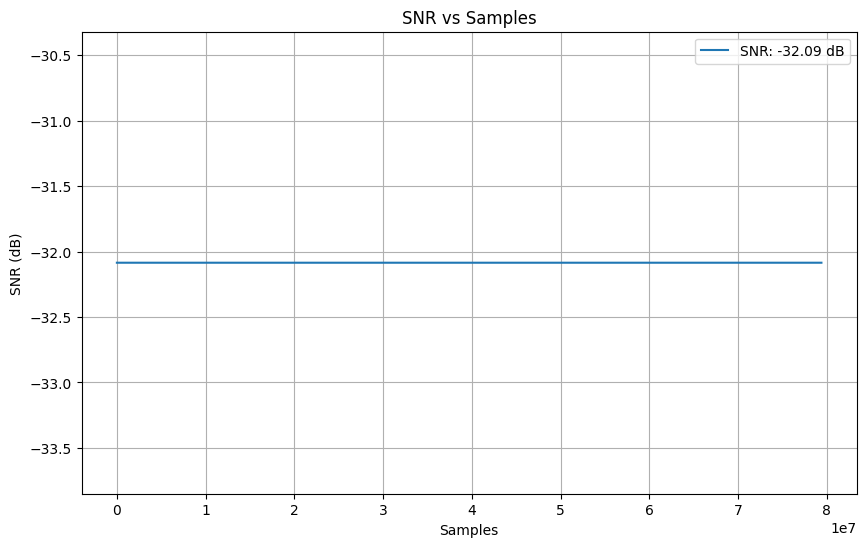

In [10]:
plot_snr(dataWithOutLoRa, dataWithOutLoRa)

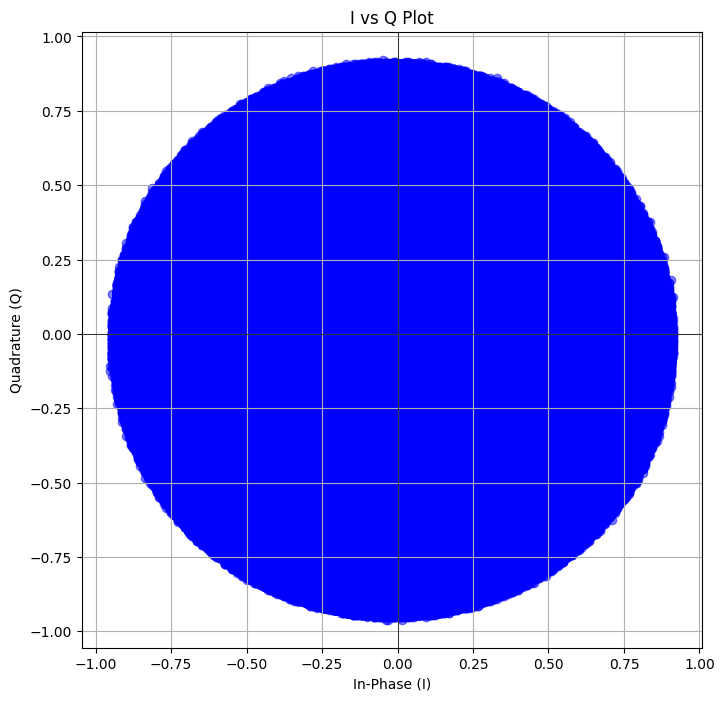

In [11]:
plot_I_vs_Q(dataWithOutInterference)

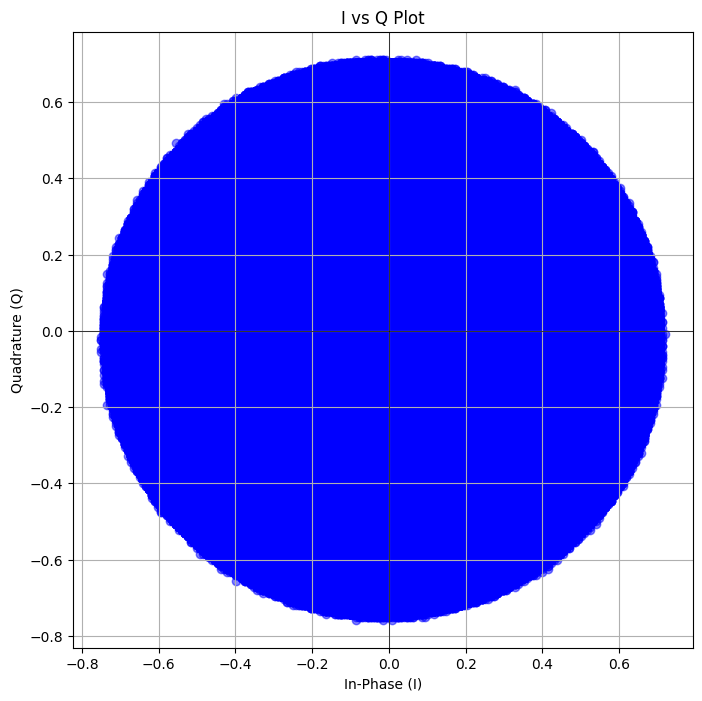

In [10]:
plot_I_vs_Q(dataWithInterference)

### Magnitude of Complex IQ data Plot

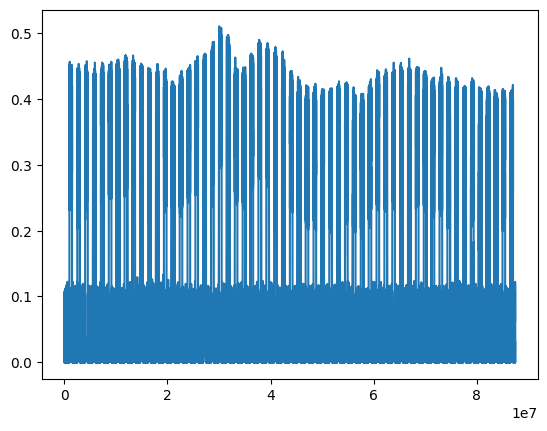

In [5]:
# combined = I + 1j * Q
plt.plot(np.abs(dataWithLoRa))
plt.show()

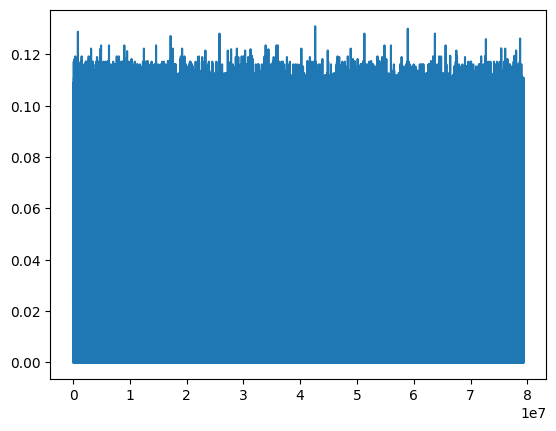

In [6]:
plt.plot(np.abs(dataWithOutLoRa))
plt.show()

### Plotting Power Spectral Density (PSD)

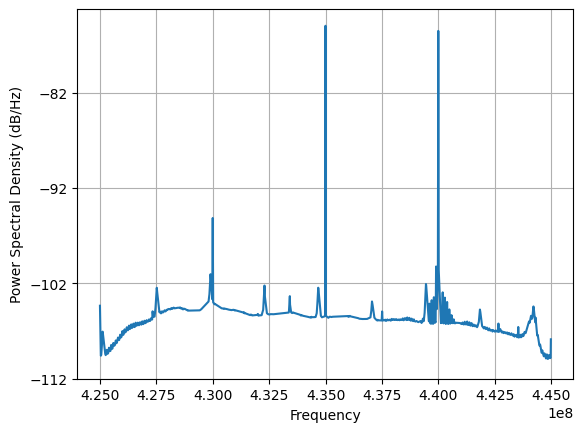

In [11]:
fig = plt.figure()
plt.psd(dataWithOutLoRa, NFFT=2048, Fc=435e6, Fs=20e6)
#plt.xlim(4326, 434e6)
plt.show()

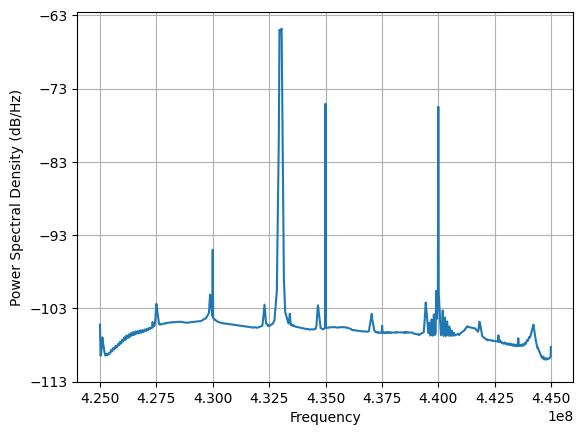

In [12]:
fig = plt.figure()
plt.psd(dataWithLoRa, NFFT=2048, Fc=435e6, Fs=20e6)
#plt.xlim(432e6, 434e6)
plt.show()

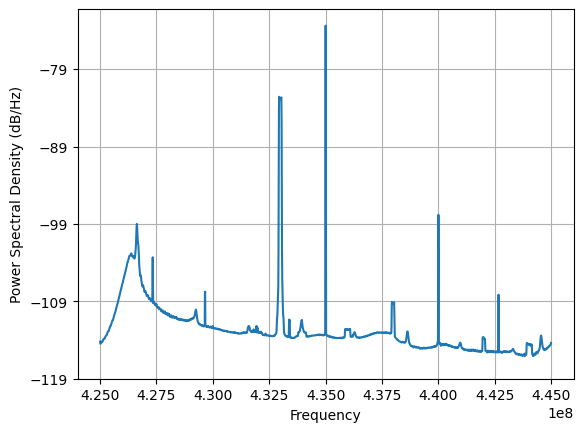

In [20]:
fig = plt.figure()
plt.psd(dataWithOutInterference, NFFT=2048, Fc=435e6, Fs=20e6)
#plt.xlim(432e6, 434e6)
plt.show()

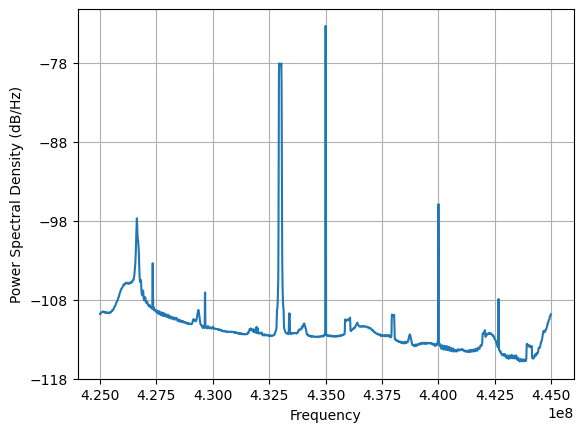

In [21]:
fig = plt.figure()
plt.psd(dataWithInterference, NFFT=2048, Fc=435e6, Fs=20e6)
#plt.xlim(432e6, 434e6)
plt.show()

### Plotting Spectrogram

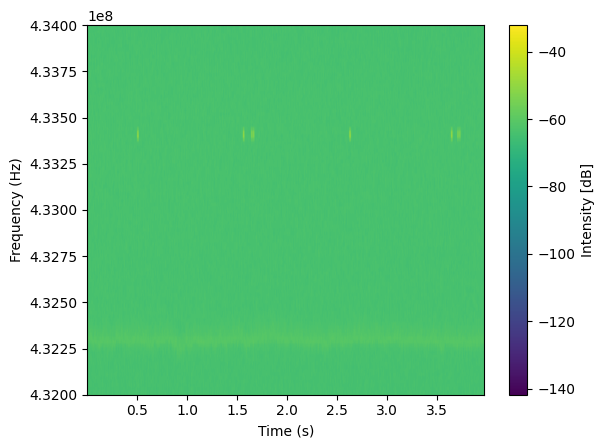

In [13]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(dataWithOutLoRa, NFFT=1024, Fs=20e6, Fc=435e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.ylim(432e6, 434e6)
plt.show()

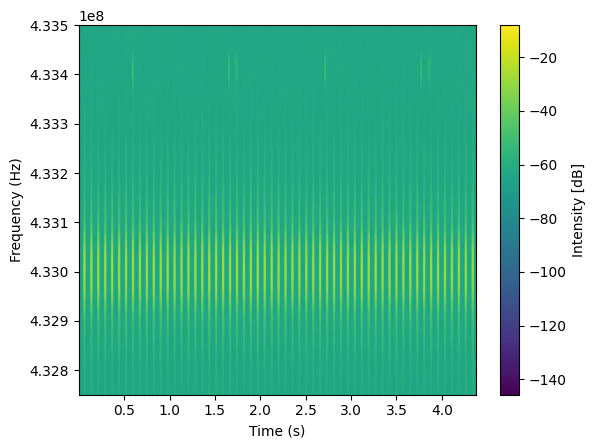

In [14]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(dataWithLoRa, NFFT=1024, Fs=20e6, Fc=435e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.ylim(432.75e6, 433.5e6)
plt.show()

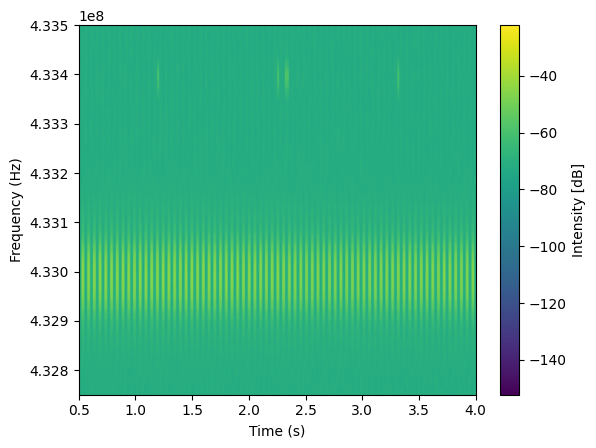

In [28]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(dataWithOutInterference, NFFT=1024, Fs=20e6, Fc=435e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.ylim(432.75e6, 433.5e6)
plt.xlim(0.5, 4)
plt.show()

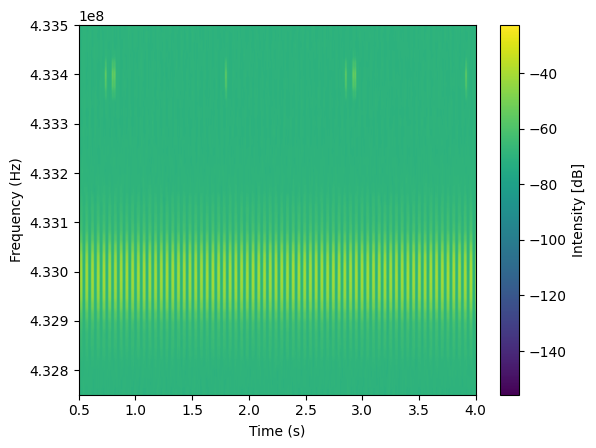

In [27]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(dataWithInterference, NFFT=1024, Fs=20e6, Fc=435e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.ylim(432.75e6, 433.5e6)
plt.xlim(0.5, 4)
plt.show()

### Plotting FFT

### Deleting Variable to Save Memory

In [28]:
del dataWithOutInterference

NameError: name 'dataWithOutInterference' is not defined

In [23]:
del dataWithInterference